In [2]:
# Loading libraries
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

In [ ]:
# Loading libraries
import random                        # Library to generate random numbers
import skimage                       # Library for image manipulation
import numpy as np                   # Library for array manipulation
import urllib.request                # Library to download data
import matplotlib.pyplot as plt      # Library used for plotting
from skimage import io, measure               # Module from skimage
from skimage.io import imread        # Module from skimage to read images as numpy arrays
from skimage.filters import gaussian # Module working with a gaussian filter
import pathlib                              # Library to work with file paths
import os
%matplotlib inline

from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

from skimage.morphology import binary_dilation
from skimage.segmentation import watershed
from skimage.draw import polygon
from skimage.measure import regionprops
from skimage.color import label2rgb
from skimage.filters import threshold_otsu
from skimage.morphology import binary_erosion
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening
from skimage.morphology import disk
from skimage.morphology import remove_small_objects
from scipy import ndimage as ndi              # Distance Transform
from skimage.feature import peak_local_max    # Local maxima in a matrix
from skimage.segmentation import watershed    # Watershed algorithm
from skimage.filters import difference_of_gaussians

In [3]:
img_0 = []
for i in range(6):
    figName = './NoDrug/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_0.append(img)


In [14]:
img_3 = []
for i in range(6):
    figName = './Drug3_1000nM/rep1_FOV' + str(i+1) + '.tif'
    img = imread(str(figName))
    img_3.append(img)

In [6]:
img_0[0].shape

(21, 650, 650, 3)

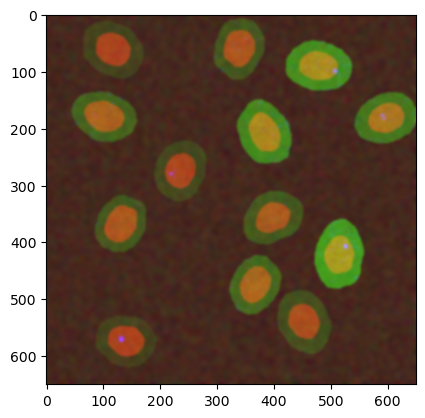

In [9]:
plt.imshow(img_0[0][0])

In [13]:
fig,axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
i=0
img = img_0[3]
# Define inital frames
Red = img[i,:,:,0]
im1 = axes[0].imshow(Red,cmap='Reds_r')
Green = img[i,:,:,1]
im2 = axes[1].imshow(Green,cmap='Greens_r')
Blue = img[i,:,:,2]
im3 =  axes[2].imshow(Blue,cmap='Blues_r')
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')

def movieFrame(i):
  Red = img[i,:,:,0]
  Green = img[i,:,:,1]
  Blue = img[i,:,:,2]
  images = [Red,Green,Blue]
  image_handles = [im1,im2,im3]
  for k,image_n in enumerate(images):
    image_handles[k].set_array(images[k])
  return image_handles

plt.close()
anim = animation.FuncAnimation(fig, movieFrame, frames=img.shape[0], interval=20, blit=True)
from IPython.display import HTML
HTML(anim.to_html5_video())

In [4]:
# FISH visualizer

def FISH_viewer(time=1):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). 
         img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    fig, axes = plt.subplots(1,3,dpi=120,figsize=(8,3))
    img = img_0[0]
    Red = img[time,:,:,0]
    im1 = axes[0].imshow(Red,cmap='Reds_r')
    Green = img[time,:,:,1]
    im2 = axes[1].imshow(Green,cmap='Greens_r')
    Blue = img[time,:,:,2]
    im3 =  axes[2].imshow(Blue,cmap='Blues_r')
    axes[0].axis('off')
    axes[1].axis('off')
    axes[2].axis('off')
    plt.show()

# Defining an interactive plot
# %pip install ipywidgets
from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

interactive_plot = interactive(FISH_viewer, time = widgets.IntSlider(min=0,max=img.shape[0]-1,step=1,value=0,description='time frame'))       
# interactive_plot = interactive(FISH_viewer, img = widgets.Dropdown(options = {'Delta N':img_0[0], 'Delta E': img_0[1]}))
# time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

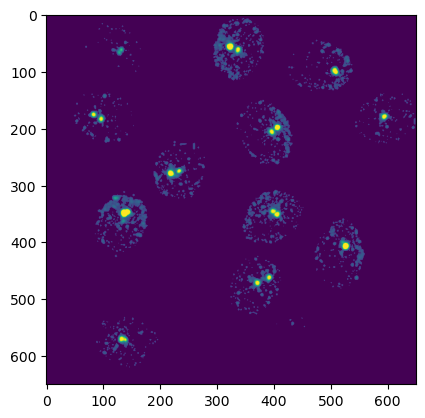

In [ ]:
img_site = np.max(img_0[0][:,:,:,2], axis=0)
img_site_pos = img_site[img_site >= np.mean(img_site)]
img_site = img_site*(img_site >= np.mean(img_site_pos))
plt.imshow(img_site)

In [ ]:
# load the videos from the dataset as 3 channels, with each channel having 21 frames. These frames represent time.
# For the red channel, we want to set a threshold to remove noise in the image red: set a thrshold to remove noise to create the mask (binary) -> number of viable cells
# nucleus size (area of 1s/2s/.../ns)

# green: cell size (mask, binary)
# average of intensity of each cell -> protein concentration of each cell (multiply mask of red)

# blue: (Mask)1.transcription sites (set intensity threshold to capture brightest), 2.mRNA (the dimmer dots)
# transcription sites found by subset of time frame (linspace) or maximum throughout all time
# blue: number of mRNA in nucleus (red True/1 multiply blue mask2(binary with threshold))
# number of mRNA in cytoplasm (green subtract red True/1 multiply blue mask1/ total - number in nucleus)


## compute mask

In [5]:
from cellpose import plot, models
from skimage.morphology import remove_small_objects

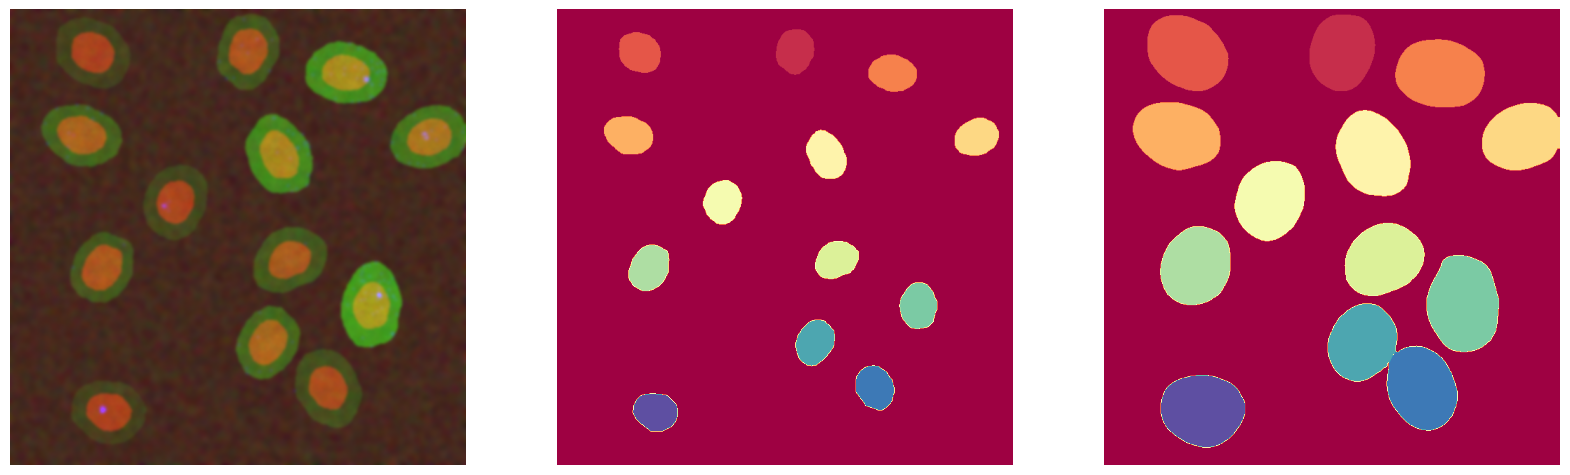

Number of nuclei: 13
Number of cytoplast: 13


In [6]:
# 
img = img_0[0]
img_nuc = img[0,:,:,0]
model = models.Cellpose(model_type='nuclei') # model_type='cyto' or model_type='nuclei'
masks_nuc  = model.eval(img_nuc, diameter=100, channels=[0,1])[0]
masks_nuc = remove_small_objects(masks_nuc, min_size=50)


img_cyto = img[0,:,:,1]
model = models.Cellpose(model_type='cyto') # model_type='cyto', 'cyto2' or model_type='nuclei'
masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])

# Plotting each one of the 3 colors independently
fig, ax = plt.subplots(1, 3, figsize=(20, 7))
ax[0].imshow(img_0[0][0,:,:,:], cmap='Greys_r')
im = ax[1].imshow(masks_nuc,cmap='Spectral')
# fig.colorbar(im, orientation='vertical')
im2 = ax[2].imshow(masks_cyto,cmap='Spectral')
# fig.colorbar(im2, orientation='vertical')

ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

print(f'Number of nuclei: {len(np.unique(masks_nuc))-1}')
print(f'Number of cytoplast: {len(np.unique(masks_cyto))-1}')

In [7]:
nucleus_indices = np.zeros(np.max(masks_cyto)+1)
for i in range(1,np.max(masks_nuc)+1):
    posn_nucl = np.mean(np.where(masks_nuc==i),axis=1).astype(int)
    nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

print(nucleus_indices)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]


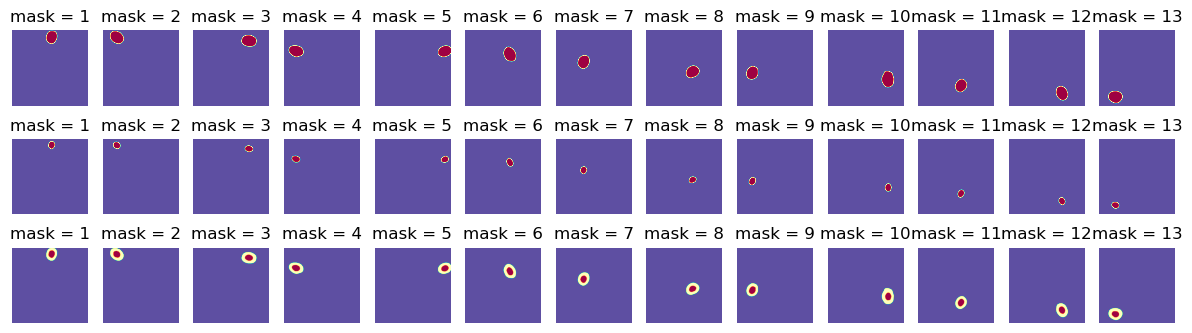

In [8]:
# Show the cytoplasms and corresponding nuclei
number_detected_cells = np.max(masks_cyto)

fig, ax = plt.subplots(3,number_detected_cells, figsize=(15, 4))
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  ax[0,i-1].imshow(selected_cyto_mask,cmap='Spectral_r')
  ax[0,i-1].set(title='mask = ' + str(i) )
  ax[0,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  ax[1,i-1].imshow(selected_nuc_mask,cmap='Spectral_r')
  ax[1,i-1].set(title='mask = ' + str(i) )
  ax[1,i-1].axis('off')

  # find which nucleus is associated with the cytosol
  combined = selected_nuc_mask.astype(int) + selected_cyto_mask.astype(int)
  ax[2,i-1].imshow(combined,cmap='Spectral_r')
  ax[2,i-1].set(title='mask = ' + str(i) )
  ax[2,i-1].axis('off')
plt.show()

In [9]:
# Make a list of their areas.
list_cyt_areas = []
list_nuc_areas = []
for i in range (1,number_detected_cells+1):
  selected_cyto_mask = masks_cyto==i
  area_cyto = np.sum(selected_cyto_mask)
  list_cyt_areas.append(area_cyto)
  selected_nuc_mask = masks_nuc==nucleus_indices[i]
  area_nuc = np.sum(selected_nuc_mask)
  list_nuc_areas.append(area_nuc)
print(list_cyt_areas, list_nuc_areas)

[8158, 9572, 9944, 9393, 8561, 9947, 8824, 8986, 8879, 11206, 8366, 9313, 9641] [2748, 2769, 2830, 2971, 2655, 2959, 2636, 2568, 2941, 2756, 2730, 2665, 2698]


In [10]:
# Let' compute the mean intensity for each cell in the image.
list_mean_intensities = []
for iMask in range (1, number_detected_cells+1):
  selected_mask = (masks_cyto==iMask)
  selected_color_image = selected_mask*img_cyto
  list_mean_intensities.append(selected_color_image[np.nonzero(selected_color_image)].mean())

# Convert the list to a pandas dataframe and display
import pandas as pd


,protein intensity
0,81.343834
1,63.891245
2,121.761062
3,88.646652
4,109.587548
5,117.721524
6,66.981981
7,81.629312
8,77.287532
9,124.436820


### mRNA analysis

C:\Users\yy5019\AppData\Local\Temp\ipykernel_21056\176852883.py:22: RuntimeWarning: divide by zero encountered in log10
  ax[1,1].plot(survival, np.log10(np.arange(len(survival))))


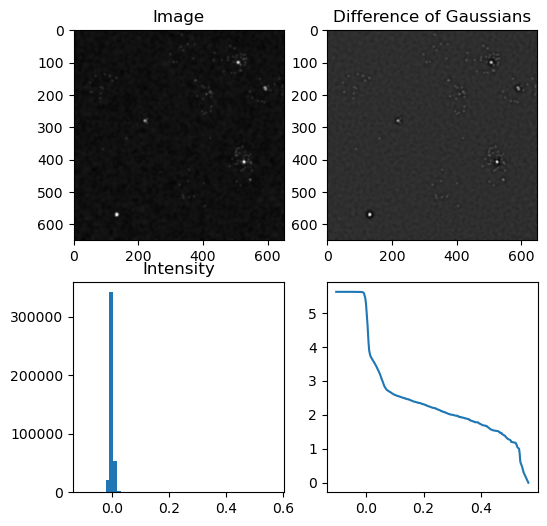

intensity range:  -0.10291584431207496 0.5708251948423355


In [11]:
from skimage.filters import difference_of_gaussians
# Selecting the color channel with RNA spots
img_spots = img[0,:,:,2]

# Show the original image
fig, ax = plt.subplots(2,2, figsize=(6, 6))
ax[0,0].imshow(img_spots,cmap='Greys_r')
ax[0,0].set(title='Image')

# Apply a difference of Gaussians filter to the image to enhance spots
img_spots_filtered = difference_of_gaussians(img_spots,low_sigma=1, high_sigma=5)
ax[0,1].imshow(img_spots_filtered,cmap='Greys_r')
ax[0,1].set(title= 'Difference of Gaussians' )

# Make a histogram of the intensity values
ax[1,0].hist(img_spots_filtered.flatten(),bins=50)
ax[1,0].set(title= 'Intensity' )

# Make a survival plot of the intensity values
survival = np.sort(img_spots_filtered.flatten())
survival = survival[::-1]
ax[1,1].plot(survival, np.log10(np.arange(len(survival))))

plt.show()
print('intensity range: ', np.min(img_spots_filtered), np.max(img_spots_filtered))

In [94]:
threshold = 0.05

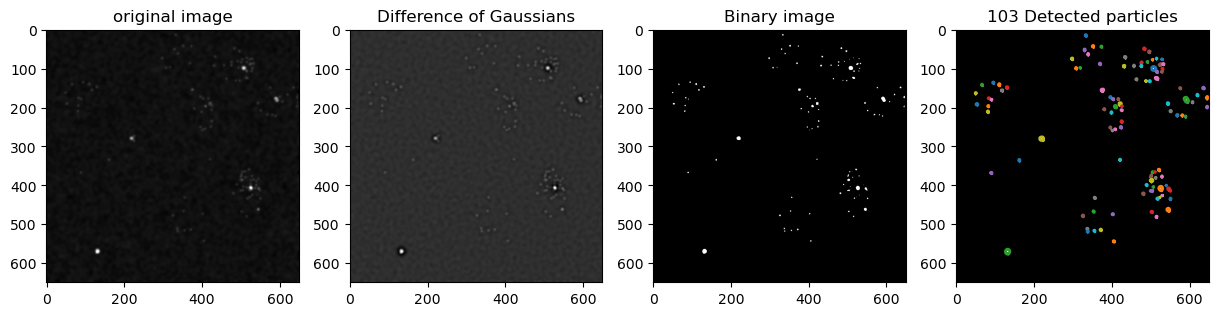

In [95]:
# Show original image in MS2 channel
fig, ax = plt.subplots(1,4, figsize=(15, 6))
ax[0].imshow(img_spots,cmap='Greys_r')
ax[0].set(title='original image')

# Apply a difference of Gaussians filter to the image to enhance spots
ax[1].imshow(img_spots_filtered,cmap='Greys_r')
ax[1].set(title= 'Difference of Gaussians' )

# Apply a Threshold to the image to create binary image
img_spots_binary = img_spots_filtered.copy()
img_spots_binary[img_spots_binary>=threshold] = threshold # Making spots above the threshold equal to the threshold value.
img_spots_binary[img_spots_binary<threshold] = 0 # Making spots below the threshold equal to 0.
ax[2].imshow(img_spots_binary,cmap='Greys_r')
ax[2].set(title= 'Binary image' )

# Image binarization
img_spots_binary[img_spots_binary!=0] = 1 # Binarization
ax[3].imshow(img_spots_binary, cmap=plt.cm.gray)

# Labeling. Joining pixels in "particles"
spot_contours = measure.find_contours(img_spots_binary, 0.5)
for contour in spot_contours:
    ax[3].plot(contour[:, 1], contour[:, 0], linewidth=2)
ax[3].set(title= str(len(spot_contours))+' Detected particles' )
plt.show()

In [26]:
# Counting the detected particles in each cell

list_cytosol_particles = np.zeros(number_detected_cells)
list_nuclear_particles = np.zeros(number_detected_cells)

# Loop through the cytosol masks
for i in range(len(spot_contours)):
    # Find the position of the particle
    posn = np.mean(spot_contours[i], axis=0).astype(int)

    # Check which cyto mask is the particle in
    cell_num = masks_cyto[posn[0], posn[1]]
    if cell_num>0:
        list_cytosol_particles[cell_num-1] += 1

        # Check if the particle is also in the nucleus
        if masks_nuc[posn[0], posn[1]] == nucleus_indices[cell_num]:
            list_nuclear_particles[cell_num-1] += 1

# Add the number of particles to the dataframe
df = pd.DataFrame(list_mean_intensities, columns=['protein intensity'])
df['nucleus area'] = np.array(list_nuc_areas).astype(int)
df['cytosol area'] = np.array(list_cyt_areas).astype(int)
df['mRNA in cytosol'] = list_cytosol_particles.astype(int)
df['mRNA in nucleus'] = list_nuclear_particles.astype(int)
df

,protein intensity,nucleus area,cytosol area,mRNA in cytosol,mRNA in nucleus
0,81.343834,2748,8158,9,3
1,63.891245,2769,9572,0,0
2,121.761062,2830,9944,21,6
3,88.646652,2971,9393,11,3
4,109.587548,2655,8561,12,3
5,117.721524,2959,9947,15,2
6,66.981981,2636,8824,1,1
7,81.629312,2568,8986,1,0
8,77.287532,2941,8879,2,0
9,124.436820,2756,11206,21,6


In [99]:
number_detected_cells

13

#### cell viewer

In [175]:
# CELL visualizer
def CELL_viewer(cell_num=1):
    '''
    This function is intended to display an image from an array of images (specifically, video: img_int8). 
         img_int8 is a numpy array with dimension [T,Y,X,C].
    drop_channel : str with options 'Ch_0', 'Ch_1', 'Ch_2', 'All'
    time: int with range 0 to the number of frames in video.
    '''
    selected_cyto_mask = masks_cyto==cell_num
    selected_nuc_mask = masks_nuc==nucleus_indices[cell_num]

    # Crop the original image to show just the selected cell
    image_cropped = img_cyto.copy()
    image_cropped[~selected_cyto_mask] = 0

    # remove rows and columns that are all zeros
    rows = np.any(image_cropped[:,:], axis=1)
    rlims = [np.min(np.where(rows)), np.max(np.where(rows))]
    cols = np.any(image_cropped[:,:,], axis=0)
    clims = [np.min(np.where(cols)), np.max(np.where(cols))]
    image_cropped = img[0, rlims[0]:rlims[1], clims[0]:clims[1]]

    # display the cropped image
    fig, ax = plt.subplots(1,1, figsize=(8, 8))
    ax.imshow(image_cropped[:,:],cmap='Spectral_r')

    # draw the contours of the cytosol and nucleus
    cyto_contours = measure.find_contours(selected_cyto_mask, 0.5)
    nuc_contours = measure.find_contours(selected_nuc_mask, 0.5)
    for contour in cyto_contours:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)
    for contour in nuc_contours:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='b', alpha=0.5)

    # Add the contours of the particles to the image
    for contour in spot_contours:
        # Check if the particle is in the selected cell
        posn = np.mean(contour, axis=0).astype(int)
        if selected_cyto_mask[posn[0], posn[1]]:
            ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='k', alpha=0.5)
    ax.axis('off')
    plt.show()

# Defining an interactive plot
# %pip install ipywidgets
from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

interactive_plot = interactive(CELL_viewer, cell_num = widgets.IntSlider(min=0,max=number_detected_cells,step=1,description='cell index'))
                                # frame = widgets.IntSlider(min=0,max=2,step=1,description='frame'))       
# time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))



### transcription site each time frame

In [195]:
threshold = 100  # Values in range [0, 255]

In [199]:
# Define an intensity threshold
img_with_spots = img_0[0]
selected_time_point = 1
img_tracking = img_with_spots.copy() # copy of the image.
selected_tp_img = img_tracking[selected_time_point,:,:,2] # selecting a time point

## Image binarization
# Making spots above the threshold equal to 255. The maximum value in a 8-bit image.
selected_tp_img[selected_tp_img>threshold] = 255
# Making spots below the threshold equal to 0.
selected_tp_img[selected_tp_img<threshold] = 0
# Binarization
selected_tp_img[selected_tp_img!=0] = 1

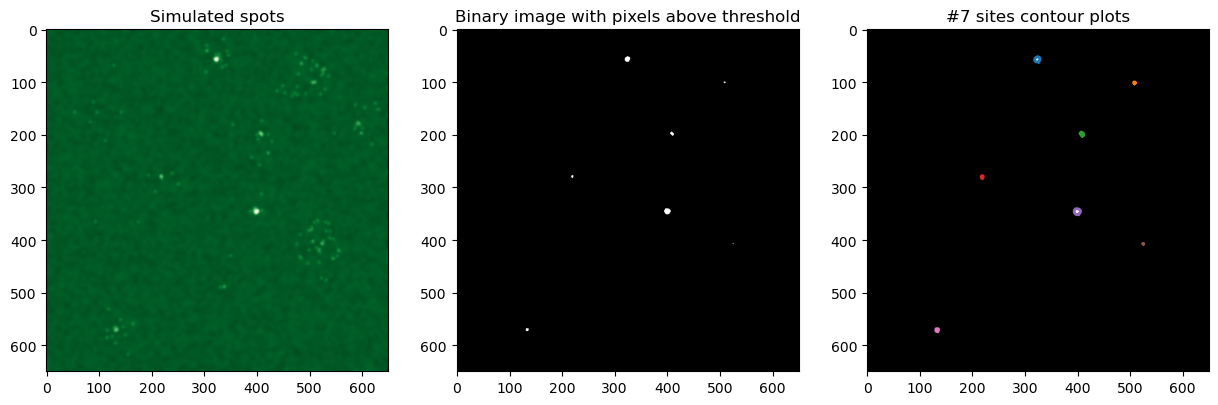

In [210]:
# Plotting
fig, ax = plt.subplots(1,3, figsize=(15, 5))
ax[0].imshow(img_with_spots[selected_time_point,:,:,2],cmap='Greens_r')
ax[0].set_title('Simulated spots')
ax[1].imshow(selected_tp_img,cmap='Greys_r')
ax[1].set_title('Binary image with pixels above threshold')

# Joining pixels in "particles"
contours = measure.find_contours(selected_tp_img, 0.5)
# Display the image and plot all contours found
ax[2].imshow(selected_tp_img, cmap=plt.cm.gray)
for contour in contours:
    ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2)
ax[2].set_title(f'#{len(contours)} sites contour plots')
plt.show()

In [215]:
# Function for a particle detector
def particle_detector(img,threshold):
  '''
  This function is intended to detect spots above a given threshold.
  Inputs:
    img: numpy array with dimensions [T,Y,X,C]
    threshold: float.

  Returns
    list_all_time_point_center_mass: list of centers of mass for each time point.  [ [ cm_particle_0_tp_0, ..., cm_particle_n_tp_0], ... , [ cm_particle_0_tp_n, ..., cm_particle_n_tp_n] ]
  '''
  img_tracking = img.copy() # copy of the image.
  num_time_points = img_tracking.shape[0]
  list_all_time_point_center_mass  =[]
  
  # Loop through all time points
  for i in range (num_time_points):
    
    list_center_mass = []
    selected_tp_img = img_tracking[i,:,:,2] # selecting a time point
    
    # Making spots above the threshold equal to 255.
    selected_tp_img[selected_tp_img>threshold] = 255
    
    # Making spots below the threshold equal to 0.
    selected_tp_img[selected_tp_img<threshold] = 0
    
    # Binarization
    selected_tp_img[selected_tp_img!=0] = 1
    
    # Joining pixels and defining particles
    contours = measure.find_contours(selected_tp_img)
    
    # Calculating the center of each particle
    for contour in contours:
      center_mass = np.mean(contour, axis = 0)
      list_center_mass.append(center_mass)
    
    # Saving results as a list of centers of mass for each time point.  [ [ cm_particle_0_tp_0, ..., cm_particle_n_tp_0], ... , [ cm_particle_0_tp_n, ..., cm_particle_n_tp_n] ]
    list_all_time_point_center_mass.append(list_center_mass)
  
  return list_all_time_point_center_mass

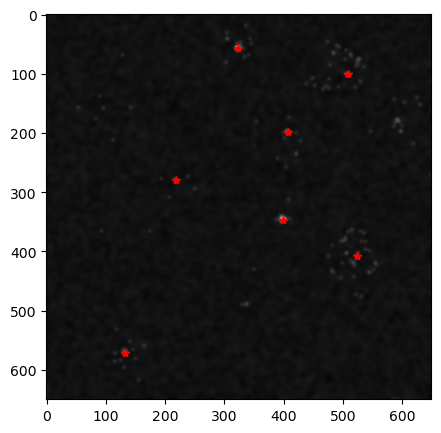

In [217]:
list_all_time_point_center_mass = particle_detector(img_with_spots,threshold=100)
# List containing [Y,X] positions for the center of mass for each particle.
list_all_time_point_center_mass[1] # Selecting a time point

# Plotting center of mass of each particle
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(img_with_spots[selected_time_point,:,:,2], cmap=plt.cm.gray)
# ax.imshow(selected_tp_img, cmap=plt.cm.gray)

for i in range(0,len(list_all_time_point_center_mass[selected_time_point])):
  ax.plot(list_all_time_point_center_mass[selected_time_point][i][1], list_all_time_point_center_mass[selected_time_point][i][0], color='r',marker='*')
plt.show()

In [230]:
tt = len(img)
list_site_number = []
for i in range(tt):
    # Define an intensity threshold
    img_with_spots = img.copy()
    img_tracking = img_with_spots.copy() # copy of the image.
    selected_tp_img = img_tracking[i,:,:,2] # selecting a time point

    ## Image binarization
    threshold = 100
    # Making spots above the threshold equal to 255. The maximum value in a 8-bit image.
    selected_tp_img[selected_tp_img>threshold] = 255
    # Making spots below the threshold equal to 0.
    selected_tp_img[selected_tp_img<threshold] = 0
    # Binarization
    selected_tp_img[selected_tp_img!=0] = 1

    contours = measure.find_contours(selected_tp_img, 0.5)
    list_site_number.append(len(contours))

In [ ]:
# CELL visualizer
def SITE_viewer(time=1, threshold=100):
    img_tracking = img_with_spots.copy() # copy of the image.
    selected_tp_img = img_tracking[time,:,:,2] # selecting a time point

    ## Image binarization
    # Making spots above the threshold equal to 255. The maximum value in a 8-bit image.
    selected_tp_img[selected_tp_img>threshold] = 255
    # Making spots below the threshold equal to 0.
    selected_tp_img[selected_tp_img<threshold] = 0
    # Binarization
    selected_tp_img[selected_tp_img!=0] = 1
    fig, ax = plt.subplots(1,3, figsize=(15, 5))
    ax[0].imshow(img_with_spots[selected_time_point,:,:,2],cmap='Greens_r')
    ax[0].set_title('Simulated spots')
    ax[1].imshow(selected_tp_img,cmap='Greys_r')
    ax[1].set_title('Binary image with pixels above threshold')

    # Joining pixels in "particles"
    contours = measure.find_contours(selected_tp_img, 0.5)
    # Display the image and plot all contours found
    ax[2].imshow(selected_tp_img, cmap=plt.cm.gray)
    for contour in contours:
        ax[2].plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax[2].set_title(f'#{len(contours)} sites contour plots')
    plt.show()

# Defining an interactive plot
# %pip install ipywidgets
from ipywidgets import interactive, HBox, VBox, Layout
import ipywidgets as widgets

interactive_plot = interactive(CELL_viewer, cell_num = widgets.IntSlider(min=0,max=number_detected_cells,step=1,description='cell index'))
                                # frame = widgets.IntSlider(min=0,max=2,step=1,description='frame'))       
# time slider parameters
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

In [222]:
#@title Function to link spots

def linking_spots(list_center_mass):
  '''
  This function is intended to link trajectories given a list of centers of mass.
  Inputs:
    list_center_mass: list of centers of mass for each time point.  [ [ cm_particle_0_tp_0, ..., cm_particle_n_tp_0], ... , [ cm_particle_0_tp_n, ..., cm_particle_n_tp_n] ]

  Returns
    list_trajectories: list of connected coordinates for all particles and all time points.
    [
    [ [Y_val_particle_0_tp_0, X_val_particle_0_tp_0]   , ... , [Y_val_particle_n_tp_0, X_val_particle_n_tp_0] ]
    ...
    [ [Y_val_particle_0_tp_n, X_val_particle_0_tp_n]   , ... , [Y_val_particle_n_tp_n, X_val_particle_n_tp_n] ]
    ]
  '''
  def get_points_on_frame(i):
      # Sub-function to convert each  element  in the list into a numpy array
      return np.array(list_center_mass[i])

  # Look for the nearest point slice by slice:
  number_frames = len (list_center_mass)
  start_positions = np.array(list_center_mass[0])

  ###### STEP 1 #########
  # FOR EVERY FRAME WE DETECTED THE PARTICLES IN THE SYSTEM
  # WE GIVE AN INDEX TO EACH PARTICLE IN EVERY FRAME
  # ARRAY ROW = FRAME COL = PARTICLE_INDEX
  idx_nearest_trajectories = np.arange(start_positions.shape[0]).reshape(1, -1) # 1D vector with the size of the number of particles
  # Loop for all frames
  for i in range(1, number_frames):
      # This class provides an index into a set of k-dimensional points which can be used to rapidly look up the nearest neighbors of any point.
      # help(KDTree)
      # help(KDTree.query)
      get_nearest = KDTree(get_points_on_frame(i))
      previous_points = get_points_on_frame(i-1)[idx_nearest_trajectories[-1, :]]
      # Returns the distances and index to the nearest neighbors.
      distance, idx_nearest = get_nearest.query(previous_points)
      # concatenate the idx_nearest_trajectories for every frame
      idx_nearest_trajectories = np.vstack((idx_nearest_trajectories, idx_nearest))
  #print('List of particle_index vs frame  \n', idx_nearest_trajectories)

  ###### STEP 2 #########
  # Converting array with particle_indexes to coordinates
  # indexing the list_center_mass using idx_nearest_trajectories
  list_trajectories =[]
  for path_idx in idx_nearest_trajectories.T:
    path_coords = [list_center_mass[i][idx] for i, idx in enumerate(path_idx)]
    list_trajectories.append(path_coords)
  return list_trajectories

In [220]:
# Loading libraries
import matplotlib.pyplot as plt                    # Library used for plotting
from matplotlib import animation                   # Library to plot animations
import numpy as np                                 # library for array manipulation
import random                                      # Library to generate random numbers
from random import randrange                       # Library to generate random numbers
import math                                        # Library for math calculations
from scipy.spatial import KDTree                   # Module to link trajectories
import skimage                                     # Library for image manipulation
from skimage.util import random_noise              # Module to add random noise to the image
from skimage import measure                        # Module to find contours on images
import skimage                                     # Library for image manipulation
from skimage.io import imread                      # Module to read images
from IPython.display import HTML                   # To display a mp4 video
import ipywidgets as widgets                       # Library to plot widgets
from ipywidgets import interact, interactive, HBox, Layout, VBox #  importing modules and functions.
import urllib.request                              # importing library to download data
import pandas as pd

# ! pip install trackpy
import trackpy as tp # Library for particle tracking

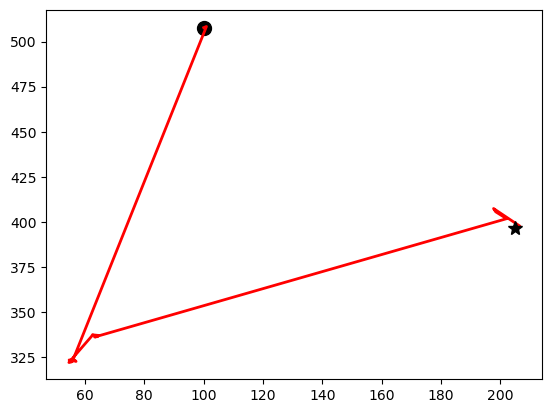

In [223]:
# Linking the center of mass for each particle in all frames
list_trajectories_short = linking_spots(list_all_time_point_center_mass)

# Plotting the trajectory for the first particle in the system
plt.plot(list_trajectories_short[0][0][0], list_trajectories_short[0][0][1]  , 'ko', markersize=10) # stating position    [particle][Frame][X],[particle][Frame][Y]
plt.plot(*zip(*list_trajectories_short[0]), '-r', linewidth=2)
plt.plot(list_trajectories_short[0][-1][0], list_trajectories_short[0][-1][1]  , 'k*', markersize=10) # ending position    [particle][Frame][X],[particle][Frame][Y]
plt.show()

In [225]:
img_site.shape

(650, 650)

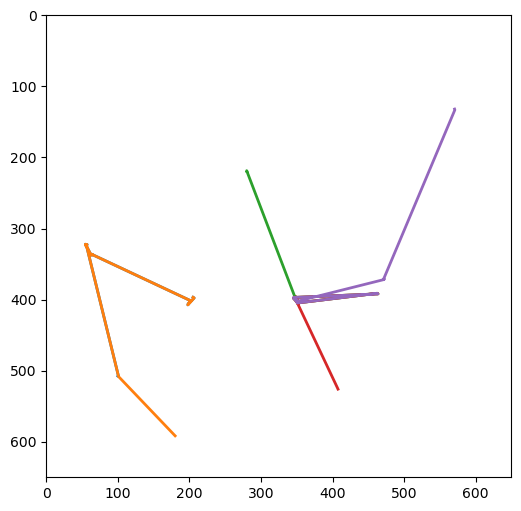

In [226]:
# Plotting individual trajectories history.
plt.figure(figsize=(6, 6))
for i in range(0, len(list_trajectories_short)):
    plt.plot(*zip(*list_trajectories_short[i]), '-', linewidth=2)
plt.xlim([0, img_site.shape[1]])
plt.ylim([img_site.shape[0], 0])   # Notice that we are reversing the order in the Y-axis
plt.show()

### transcription sites

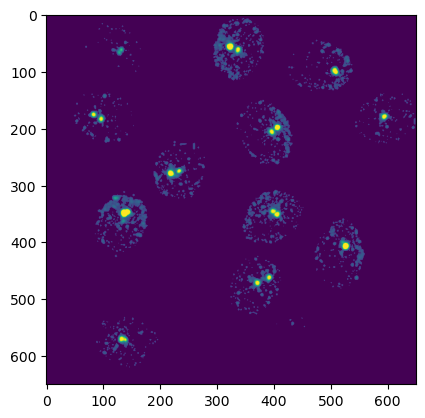

In [ ]:
img_site = np.max(img[:,:,:,2], axis=0)
img_site_pos = img_site[img_site >= np.mean(img_site)]
img_site = img_site*(img_site >= np.mean(img_site_pos))
plt.imshow(img_site)

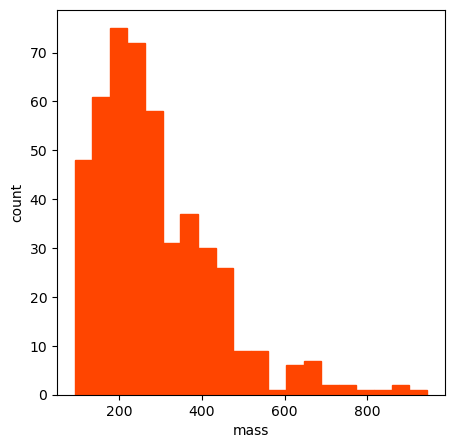

In [172]:
import trackpy as tp

# This section generates an histogram with the intensity of the detected particles in the image.
particle_size = 7 # according to the documentation must be an odd number 3,5,7,9 etc.
minimal_intensity_for_selection = 0 # minimal intensity to detect a particle.
# "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots
# spots_detected_dataframe = tp.locate(img_spots, diameter=particle_size, minmass=minimal_intensity_for_selection)
sites_detected_dataframe = tp.locate(img_site, diameter=particle_size, minmass=minimal_intensity_for_selection)

fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.hist(sites_detected_dataframe['mass'], bins=20, color = "orangered", ec="orangered")
ax.set(xlabel='mass', ylabel='count')
# ax.set_ylim([0,1000])
plt.show()

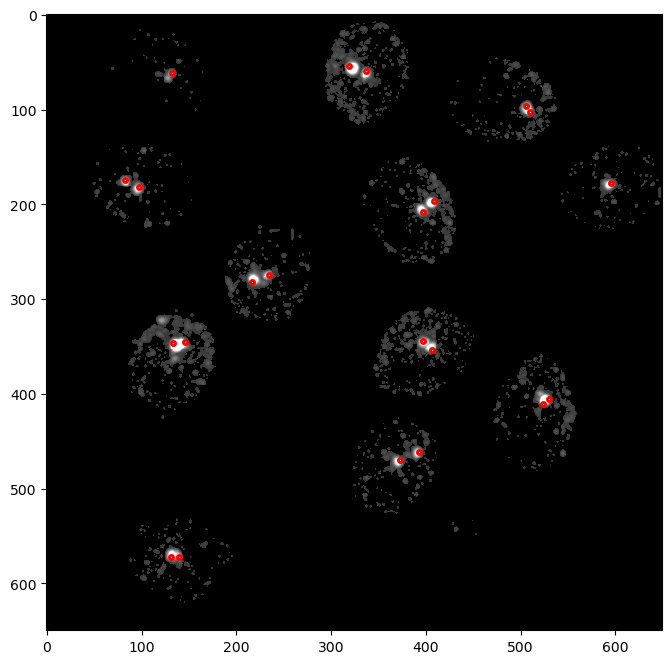

In [192]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sites_detected_dataframe = tp.locate(img_site,diameter=7, minmass=580) # "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots
tp.annotate(sites_detected_dataframe,img_site,plot_style={'markersize': 3})  # tp.anotate is a trackpy function that displays the image with the detected spots
ax.axis('off')
plt.show()

In [165]:
sites_detected_dataframe.head()

,y,x,mass,size,ecc,signal,raw_mass,ep
37,54.287534,319.124355,614.723262,1.920785,0.243112,39.340797,6272.0,0.000572
41,59.451504,337.079663,774.696740,1.966078,0.197426,42.883333,6046.0,0.000593
42,61.901290,132.123388,664.878117,1.974884,0.057394,36.544058,4374.0,0.000820
80,96.226884,505.230879,653.318262,2.030166,0.156103,33.374420,6066.0,0.000591
85,102.902709,509.914039,756.984059,1.989876,0.178230,40.086594,6547.0,0.000548


In [149]:
def spots_in_mask(df,masks):
    # extracting the contours in the image
    coords = np.array([df.y, df.x]).T # These are the points detected by trackpy
    coords_int = np.round(coords).astype(int)  # or np.floor, depends
    values_at_coords = masks[tuple(coords_int.T)] # If 1 the value is in the mask
    df['In Mask']=values_at_coords # Check if pts are on/in polygon mask
    return df

dataframe_spots_in_nuc = spots_in_mask(df=sites_detected_dataframe, masks=masks_nuc)

In [150]:
dataframe_spots_in_nuc.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,In Mask
37,54.287534,319.124355,614.723262,1.920785,0.243112,39.340797,6272.0,0.000572,1
41,59.451504,337.079663,774.696740,1.966078,0.197426,42.883333,6046.0,0.000593,1
42,61.901290,132.123388,664.878117,1.974884,0.057394,36.544058,4374.0,0.000820,2
80,96.226884,505.230879,653.318262,2.030166,0.156103,33.374420,6066.0,0.000591,3
85,102.902709,509.914039,756.984059,1.989876,0.178230,40.086594,6547.0,0.000548,3


### transcription sites (gaussian difference filter)

In [183]:
def SITE_filter_viewer(low_sigma=1, high_sigma=5):
    img_spots_filtered = difference_of_gaussians(img_site,low_sigma, high_sigma)
    plt.imshow(img_spots_filtered,cmap='Greys_r')
    plt.show()

# Defining an interactive plot
interactive_plot = interactive(SITE_filter_viewer,
                               low_sigma = widgets.IntSlider(min=0,max=10,step=1,description='low sigma'),
                               high_sigma = widgets.IntSlider(min=5,max=20,step=1,description='high sigma'))
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

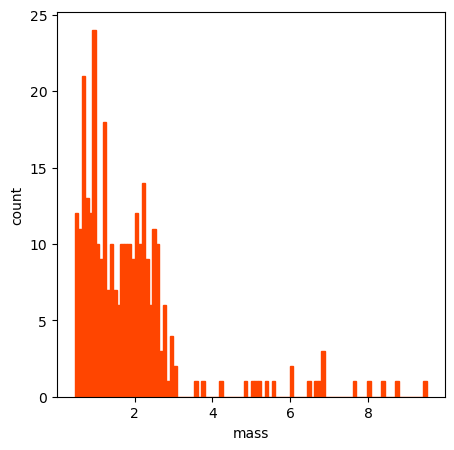

In [189]:
img_site_filtered = difference_of_gaussians(img_site, 1, 20)
sites_detected_dataframe = tp.locate(img_site_filtered, diameter=9, minmass=0)
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.hist(sites_detected_dataframe['mass'], bins=100, color = "orangered", ec="orangered")
ax.set(xlabel='mass', ylabel='count')
plt.show()

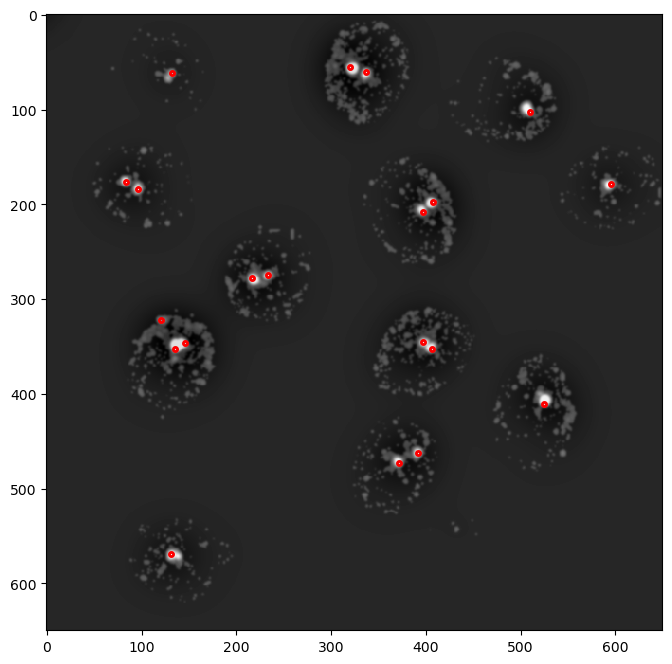

In [191]:
fig, ax = plt.subplots(1,1, figsize=(8, 8))
sites_detected_dataframe = tp.locate(img_site_filtered,diameter=9, minmass=4) # "spots_detected_dataframe" is a pandas data frame that contains the information about the detected spots
tp.annotate(sites_detected_dataframe,img_site_filtered,plot_style={'markersize': 3})  # tp.anotate is a trackpy function that displays the image with the detected spots
ax.axis('off')
plt.show()

### single cell plot

In [194]:
def CELL_viewer(cell_num=1):
    selected_cyto_mask = masks_cyto==cell_num
    selected_nuc_mask = masks_nuc==nucleus_indices[cell_num]

    # Crop the original image to show just the selected cell
    image_cropped = img[0].copy()
    image_cropped[~selected_cyto_mask,:] = 0

    # remove rows and columns that are all zeros
    rows = np.any(image_cropped[:,:,0], axis=1)
    rlims = [np.min(np.where(rows)), np.max(np.where(rows))]
    cols = np.any(image_cropped[:,:,0,], axis=0)
    clims = [np.min(np.where(cols)), np.max(np.where(cols))]
    image_cropped = image_cropped[rlims[0]:rlims[1], clims[0]:clims[1], :]

    # display the cropped image
    fig, ax = plt.subplots(1,1, figsize=(8, 8))
    ax.imshow(image_cropped)

    # draw the contours of the cytosol and nucleus
    cyto_contours = measure.find_contours(selected_cyto_mask, 0.5)
    nuc_contours = measure.find_contours(selected_nuc_mask, 0.5)
    for contour in cyto_contours:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)
    for contour in nuc_contours:
        ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='b', alpha=0.5)

    # Add the contours where our first approach found particles in the image
    for contour in spot_contours:
        # Check if the particle is in the selected cell
        posn = np.mean(contour, axis=0).astype(int)
        if selected_cyto_mask[posn[0], posn[1]]:
            ax.plot(contour[:, 1]-clims[0], contour[:, 0]-rlims[0], linewidth=2, color='r', alpha=0.5)

    # Add yellow square markers where trackpy found particles to the image
    for i in range(len(sites_detected_dataframe)):
        # Check if the particle is in the selected cell
        posn = np.array([sites_detected_dataframe.y.values[i], sites_detected_dataframe.x.values[i]]).astype(int)
        if selected_cyto_mask[posn[0], posn[1]]:
            ax.plot(posn[1]-clims[0], posn[0]-rlims[0], 's', color='y', alpha=0.5, markersize=10)
    ax.axis('off')
    plt.show()

interactive_plot = interactive(CELL_viewer, cell_num = widgets.IntSlider(min=1,max=number_detected_cells,step=1,description='cell index'))
# Creates the controls
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
# Creates the outputs
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))

### transcription sites_max

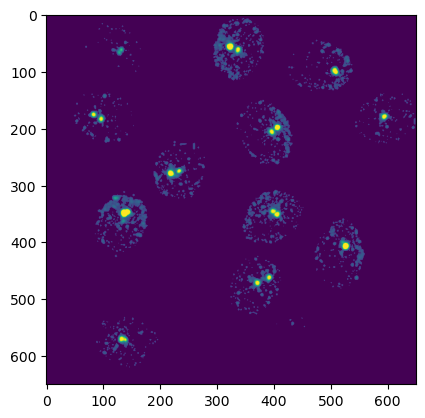

In [29]:
img_site = np.max(img[:,:,:,2], axis=0)
img_site_pos = img_site[img_site >= np.mean(img_site)]
img_site = img_site*(img_site >= np.mean(img_site_pos))
plt.imshow(img_site)

In [79]:
# Thresholding the mRNA image
def viewer(threshold=50):
    test_image = np.max(img_0[0][:,:,:,2], axis=0)
    mask_image = np.zeros(test_image.shape)
    mask_image[test_image>threshold] = 255
    f,ax = plt.subplots()
    ax.imshow(mask_image, cmap='Greys')
    plt.show()

interactive_plot = interactive(viewer,threshold = widgets.IntSlider(min=40,max=250,step=1,value=20,description='threshold'))       
controls = HBox(interactive_plot.children[:-1], layout = Layout(flex_flow='row wrap'))
output = interactive_plot.children[-1]

# Display the controls and output as an interactive widget
display(VBox([controls, output]))   

In [45]:
threshold = 230

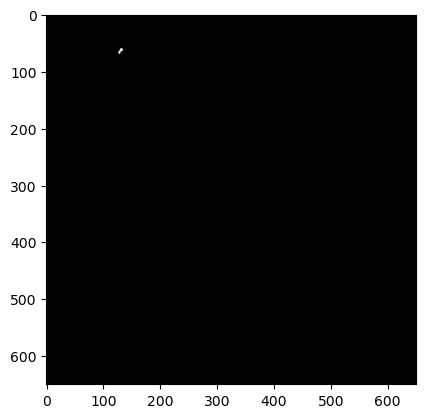

In [55]:
test_image = np.max(img_0[0][:,:,:,2], axis=0)
threshold = 130
selected_mask = (masks_cyto==2)
test_image = test_image*selected_mask
mask_image = np.zeros(test_image.shape)
mask_image[test_image>threshold] = 255
plt.imshow(mask_image, cmap='grey')

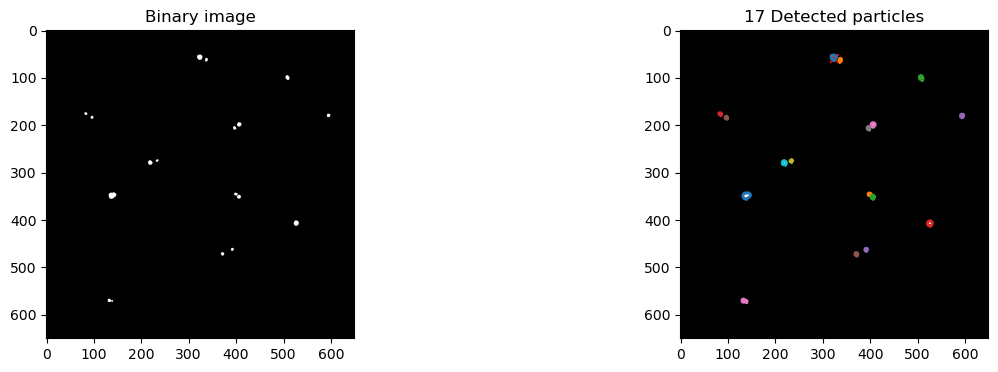

In [72]:
fig, ax = plt.subplots(1,2, figsize = (15,4))
test_image = np.max(img_0[0][:,:,:,2], axis=0)
mask_image = np.zeros(test_image.shape)
threshold = 230
mask_image[test_image>=threshold] = threshold # Making spots above the threshold equal to the threshold value.
mask_image[test_image<threshold] = 0 # Making spots below the threshold equal to 0.
ax[0].imshow(mask_image,cmap='Greys_r')
ax[0].set(title= 'Binary image' )

# Image binarization
mask_image[mask_image!=0] = 1 # Binarization
ax[1].imshow(mask_image, cmap=plt.cm.gray)

# Labeling. Joining pixels in "particles"
site_contours = measure.find_contours(mask_image, 0.5)
for contour in site_contours:
    ax[1].plot(contour[:, 1], contour[:, 0], linewidth=2)
ax[1].set(title= str(len(site_contours))+' Detected transcription sites' )
number_detected_sites = len(site_contours)
ax[1].scatter(np.mean(site_contours[0],axis=0)[1],np.mean(site_contours[0],axis=0)[0],marker='x',c='r')
plt.show()

In [84]:
list_site_center = []
site_indices = np.zeros(len(spot_contours))
for i in range(len(spot_contours)):
 posn_site = np.mean(spot_contours[i],axis=0)[::-1]
 list_site_center.append(posn_site)
 site_indices[i] = masks_cyto[int(posn_site[0]),int(posn_site[1])]
print(site_indices)

[ 0.  0.  0.  0. 13.  0.  0.  0.  7.  0.  0.  0.  0. 12.  0.  0.  0.]


In [ ]:
nucleus_indices = np.zeros(np.max(masks_cyto)+1)
for i in range(len(list_site_center)):
    posn_site = list_site_center[i]
    nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

print(nucleus_indices)

## overall functon

In [ ]:
def find_nuc_cyto(img):
    tt = img.shape[0]
    t = 0
    img_nuc = img[t,:,:,0]
    model = models.Cellpose(model_type='nuclei') # model_type='cyto' or model_type='nuclei'
    masks_nuc  = model.eval(img_nuc, diameter=200, channels=[0,1])[0]
    masks_nuc = remove_small_objects(masks_nuc, min_size=50)

    img_cyto = img[t,:,:,1]
    model = models.Cellpose(model_type='cyto') # model_type='cyto', 'cyto2' or model_type='nuclei'
    masks_cyto, flows, styles, diams = model.eval(img_cyto, diameter=200, channels=[0,2])

    nucleus_indices = np.zeros(np.max(masks_cyto)+1)
    for i in range(1,np.max(masks_nuc)+1):
        posn_nucl = np.mean(np.where(masks_nuc==i),axis=1).astype(int)
        nucleus_indices[masks_cyto[posn_nucl[0],posn_nucl[1]]] = i

    number_detected_cells = np.max(masks_cyto)
    
    # Make a list of their areas.
    list_cyt_areas = []
    list_nuc_areas = []
    for i in range (1, number_detected_cells+1):
        selected_cyto_mask = (masks_cyto==i)
        area_cyto = np.sum(selected_cyto_mask)
        list_cyt_areas.append(area_cyto)
        selected_nuc_mask = (masks_nuc==nucleus_indices[i])
        area_nuc = np.sum(selected_nuc_mask)
        list_nuc_areas.append(area_nuc)
    
    # Let' compute the mean intensity for each cell in the image.
    list_mean_intensities = []
    for iMask in range (1, number_detected_cells+1):
        selected_mask = (masks_cyto==iMask)
        mean_intensity = []
        for iColor in range(3):
            selected_color_image = selected_mask*img_cyto[:,:,iColor]
            mean_intensity.append(selected_color_image[np.nonzero(selected_color_image)].mean()) # this step is to avoid the 0 values!!!
    list_mean_intensities.append(mean_intensity)

    # Convert the list to a pandas dataframe and display
    import pandas as pd
    df = pd.DataFrame(list_mean_intensities, columns=['Ch0', 'Ch1', 'Ch2'])
    
    